In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 데이터 로드
df_merged = pd.read_csv('df_merged.csv')

### SSP3 이상 패턴 심층 분석
- 자료조사: SSP3 = 중간 스트레스, SSP5 = 극한 스트레스
- 실제: SSP3가 일부 지표에서 SSP5보다 나쁨
- 가능한 원인: CO2와 온도의 복합 효과?

In [3]:
# 1-1. 시나리오별 주요 지표 상세 비교
indicators = ['CO2ppm', 'Temp', 'VPD', 'Fv-Fm', 'PI_abs', 'TChl', 
              'Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Root_TFC',
              'Leaf_ExtractionYield', 'Root_ExtractionYield']

In [7]:
scenario_comparison = df_merged.groupby('scenario')[indicators].mean()
print(scenario_comparison.round(3))

            CO2ppm    Temp    VPD  Fv-Fm  PI_abs   TChl  Leaf_TPC  Root_TPC  \
scenario                                                                      
SSP1       427.826  22.859  2.172  0.815   2.198  8.832     7.482     5.114   
SSP3       918.367  24.657  2.403  0.790   1.413  6.772     7.801     5.154   
SSP5      1173.970  25.465  2.508  0.789   1.228  5.628     7.842     5.174   

          Leaf_TFC  Root_TFC  Leaf_ExtractionYield  Root_ExtractionYield  
scenario                                                                  
SSP1         4.524     0.569                14.253                13.516  
SSP3         4.646     0.629                12.992                13.001  
SSP5         4.840     0.618                13.492                14.112  


In [8]:
# SSP3가 SSP5보다 나쁜 지표 찾기
worse_indicators = []
for col in indicators:
    if scenario_comparison.loc['SSP3', col] < scenario_comparison.loc['SSP5', col]:
        if col not in ['CO2ppm', 'Temp', 'VPD']:  # 환경변수 제외
            worse_indicators.append(col)

print(f"\nSSP3가 SSP5보다 낮은 지표: {worse_indicators}")


SSP3가 SSP5보다 낮은 지표: ['Leaf_TPC', 'Root_TPC', 'Leaf_TFC', 'Leaf_ExtractionYield', 'Root_ExtractionYield']


In [9]:
# 1-2. SSP3 월별 패턴 분석
ssp3_monthly = df_merged[df_merged['scenario'] == 'SSP3'].groupby('month')[['PI_abs', 'Fv-Fm', 'Leaf_TPC']].mean()

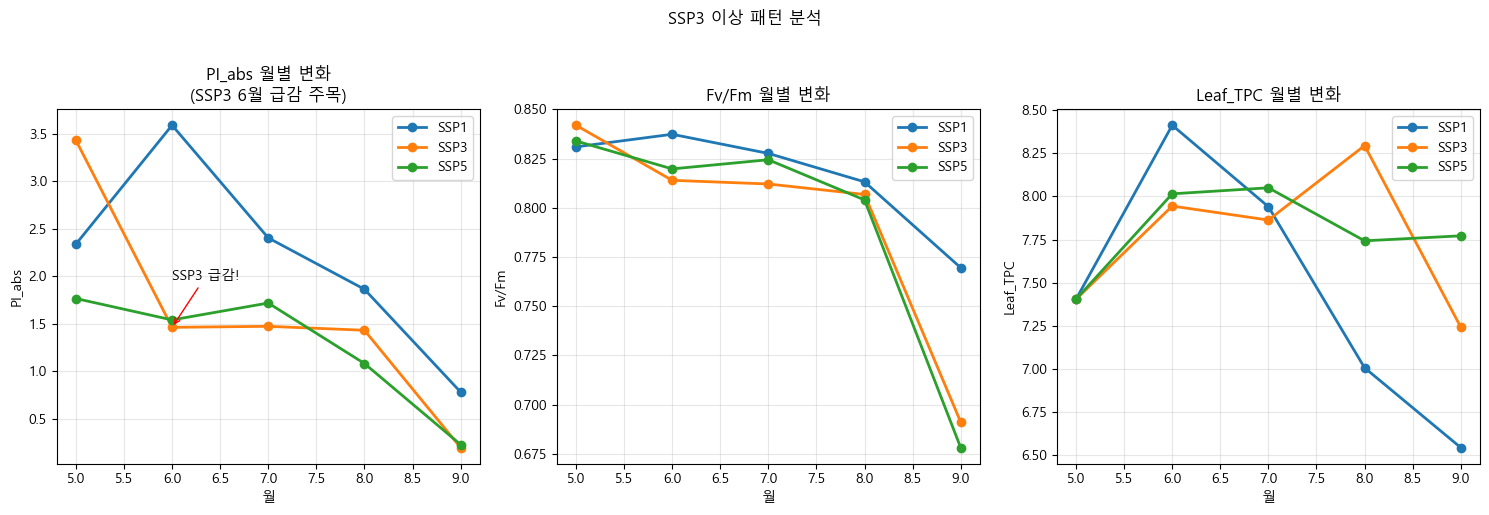

In [16]:
plt.figure(figsize=(15, 5))
# PI_abs 월별 변화
plt.subplot(1, 3, 1)
for scenario in ['SSP1', 'SSP3', 'SSP5']:
    data = df_merged[df_merged['scenario'] == scenario].groupby('month')['PI_abs'].mean()
    plt.plot(data.index, data.values, marker='o', label=scenario, linewidth=2)
plt.xlabel('월')
plt.ylabel('PI_abs')
plt.title('PI_abs 월별 변화\n(SSP3 6월 급감 주목)')
plt.legend()
plt.grid(True, alpha=0.3)
# SSP3 6월 급감 표시
if 6 in ssp3_monthly.index:
    plt.annotate('SSP3 급감!', xy=(6, ssp3_monthly.loc[6, 'PI_abs']), 
                xytext=(6, ssp3_monthly.loc[6, 'PI_abs'] + 0.5),
                arrowprops=dict(arrowstyle='->', color='red'))

# Fv/Fm 월별 변화
plt.subplot(1, 3, 2)
for scenario in ['SSP1', 'SSP3', 'SSP5']:
    data = df_merged[df_merged['scenario'] == scenario].groupby('month')['Fv-Fm'].mean()
    plt.plot(data.index, data.values, marker='o', label=scenario, linewidth=2)
plt.xlabel('월')
plt.ylabel('Fv/Fm')
plt.title('Fv/Fm 월별 변화')
plt.legend()
plt.grid(True, alpha=0.3)

# Leaf_TPC 월별 변화
plt.subplot(1, 3, 3)
for scenario in ['SSP1', 'SSP3', 'SSP5']:
    data = df_merged[df_merged['scenario'] == scenario].groupby('month')['Leaf_TPC'].mean()
    plt.plot(data.index, data.values, marker='o', label=scenario, linewidth=2)
plt.xlabel('월')
plt.ylabel('Leaf_TPC')
plt.title('Leaf_TPC 월별 변화')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle('SSP3 이상 패턴 분석', y=1.02)
plt.tight_layout()
plt.show()

- SSP3 = 6월 광합성 효율 최저 -> 6 ~ 8월까지 평형 유지
- Pl_abs = 급감, Pl_abs에 비해 Fv/Fm = 좋은 안정성 보임
- 모든 시나리오 Fv/Fm 0.75 이상 유지 -> 잎 평형맥 구조로 인한 균등 자원 공급
- SSP1 = 정상 적응 -> 6월 Pl_abs 최고점 = 건강 성장 주기, 예측 가능 패턴
- SSP3 = 급격 적응 -> 6월 스트레스 임계점(Pl_abs 급감) -> 즉시 모드 전환 -> 지연 방어 반응(8월 TPC 최고) -> 8월 수확 최고점(TPC 가장 높음)
- SSP5 = 점진 적응 -> 완만 감소 패턴 -> 지속 적응 = 초기 억제 모드 

In [17]:
# 1-3. SSP3 개체별 변동성 확인
print("\n### 3. SSP3 변동성 분석")

variance_by_scenario = df_merged.groupby('scenario')[['PI_abs', 'Fv-Fm', 'Leaf_TPC']].std()
print("\n시나리오별 표준편차:")
print(variance_by_scenario.round(3))
print("\n→ SSP3 변동성이 크면 개체간 차이가 큼 (불안정)")


### 3. SSP3 변동성 분석

시나리오별 표준편차:
          PI_abs  Fv-Fm  Leaf_TPC
scenario                         
SSP1       1.000  0.026     0.704
SSP3       0.893  0.052     0.395
SSP5       0.620  0.063     0.210

→ SSP3 변동성이 크면 개체간 차이가 큼 (불안정)


- 위 SSP3 변동성 크면 개체간 차이가 크다는 말 = 틀림
- SSP3는 스트레스 적응 과정에서 나타나는 중간 변동성
- SSP5의 낮은 변동성은 "안정"이 아니라 "활력 저하"
- 변동성 = 생리적 반응 능력의 지표

### SSP1 이상 개체 분석

In [19]:
# 2-1. SSP1 내 광합성 이상 개체
ssp1_data = df_merged[df_merged['scenario'] == 'SSP1']
ssp1_low_pi = ssp1_data[ssp1_data['PI_abs'] < ssp1_data['PI_abs'].quantile(0.25)]

print(f"\n### SSP1 광합성 저하 개체 분석")
print(f"SSP1 전체: {len(ssp1_data)}개")
print(f"PI_abs 하위 25%: {len(ssp1_low_pi)}개")


### SSP1 광합성 저하 개체 분석
SSP1 전체: 135개
PI_abs 하위 25%: 34개


In [20]:
# 이상 개체의 특징
if len(ssp1_low_pi) > 0:
    print("\n이상 개체 특징:")
    print(f"  월 분포: {ssp1_low_pi['month'].value_counts().to_dict()}")
    print(f"  평균 온도: {ssp1_low_pi['Temp'].mean():.1f}°C (전체: {ssp1_data['Temp'].mean():.1f}°C)")
    print(f"  평균 VPD: {ssp1_low_pi['VPD'].mean():.2f} (전체: {ssp1_data['VPD'].mean():.2f})")


이상 개체 특징:
  월 분포: {9: 28, 8: 6}
  평균 온도: 23.5°C (전체: 22.9°C)
  평균 VPD: 2.25 (전체: 2.17)


### 월별 × 온도별 세분화 분석

In [21]:
# 3-1. 5월 페놀 함량 상세 분석
may_data = df_merged[df_merged['month'] == 5]
if len(may_data) > 0:
    may_stats = may_data.groupby('scenario')[['Leaf_TPC', 'Root_TPC']].agg(['mean', 'std'])
    print("\n5월 시나리오별 TPC:")
    print(may_stats.round(3))
    
    # 자료조사 값과 비교
    overall_may_tpc = may_data['Root_TPC'].mean()
    print(f"\n5월 전체 Root_TPC 평균: {overall_may_tpc:.2f}mg (자료조사: 6.35mg)")


5월 시나리오별 TPC:
         Leaf_TPC        Root_TPC       
             mean    std     mean    std
scenario                                
SSP1        7.405  0.052    6.354  0.061
SSP3        7.405  0.052    6.354  0.061
SSP5        7.405  0.052    6.354  0.061

5월 전체 Root_TPC 평균: 6.35mg (자료조사: 6.35mg)


In [22]:
# 3-2. 온도 구간별 페놀 생산
# 온도 구간 정의
df_merged['temp_range'] = pd.cut(df_merged['Temp'], 
                                 bins=[0, 15, 20, 25, 30, 40],
                                 labels=['<15°C', '15-20°C', '20-25°C', '25-30°C', '>30°C'])

temp_phenol = df_merged.groupby(['temp_range', 'scenario'])[['Leaf_TPC', 'Root_TPC']].mean()
print("\n온도별 페놀 생산:")
print(temp_phenol.round(3))


온도별 페놀 생산:
                     Leaf_TPC  Root_TPC
temp_range scenario                    
<15°C      SSP1           NaN       NaN
           SSP3           NaN       NaN
           SSP5           NaN       NaN
15-20°C    SSP1         7.405     6.354
           SSP3         7.407     6.351
           SSP5         7.407     6.351
20-25°C    SSP1         7.492     4.959
           SSP3         7.923     5.252
           SSP5         7.990     5.331
25-30°C    SSP1           NaN       NaN
           SSP3         7.822     4.941
           SSP5         7.862     4.945
>30°C      SSP1           NaN       NaN
           SSP3           NaN       NaN
           SSP5           NaN       NaN


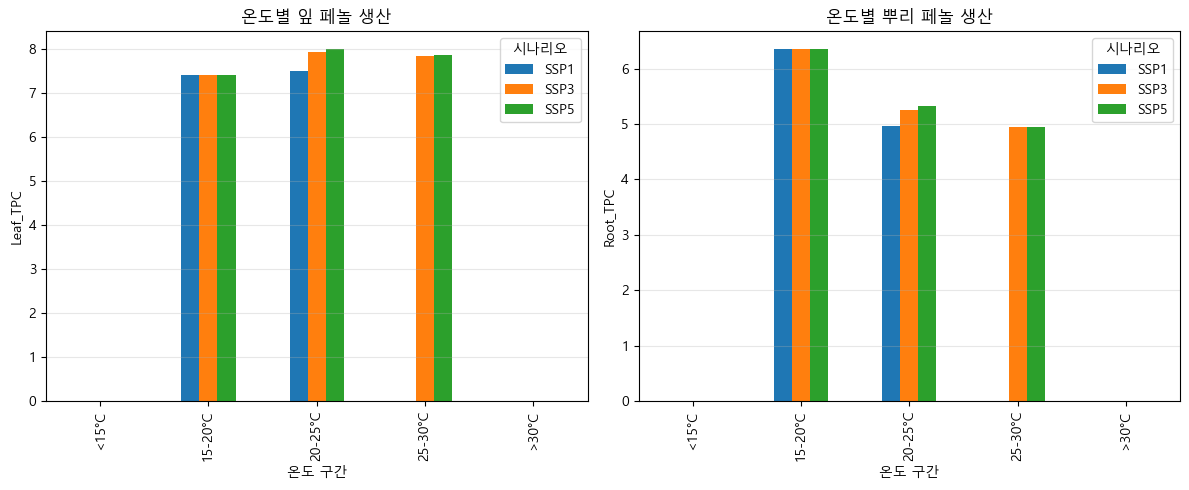

In [23]:
# 시각화
plt.figure(figsize=(12, 5))

# 온도별 Leaf_TPC
plt.subplot(1, 2, 1)
temp_phenol_pivot = temp_phenol['Leaf_TPC'].unstack()
temp_phenol_pivot.plot(kind='bar', ax=plt.gca())
plt.xlabel('온도 구간')
plt.ylabel('Leaf_TPC')
plt.title('온도별 잎 페놀 생산')
plt.legend(title='시나리오')
plt.grid(True, alpha=0.3, axis='y')

# 온도별 Root_TPC
plt.subplot(1, 2, 2)
temp_phenol_pivot = temp_phenol['Root_TPC'].unstack()
temp_phenol_pivot.plot(kind='bar', ax=plt.gca())
plt.xlabel('온도 구간')
plt.ylabel('Root_TPC')
plt.title('온도별 뿌리 페놀 생산')
plt.legend(title='시나리오')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

- 15 - 20도 = 뿌리 최적 결과
- 20 - 25도 = 잎 최적 결과

### Source-Sink 세부 분석

In [25]:
# 4-1. 월별 × 시나리오별 Source-Sink
df_merged['source_sink_ratio'] = df_merged['Leaf_TPC'] / df_merged['Root_TPC']

ss_analysis = df_merged.pivot_table(values='source_sink_ratio', 
                                    index='month', 
                                    columns='scenario', 
                                    aggfunc='mean')

print("\n월별 × 시나리오별 Source-Sink 비율:")
print(ss_analysis.round(3))


월별 × 시나리오별 Source-Sink 비율:
scenario   SSP1   SSP3   SSP5
month                        
5         1.166  1.166  1.166
6         1.662  1.524  1.514
7         1.544  1.371  1.651
8         1.527  1.789  1.651
9         1.296  1.655  1.472


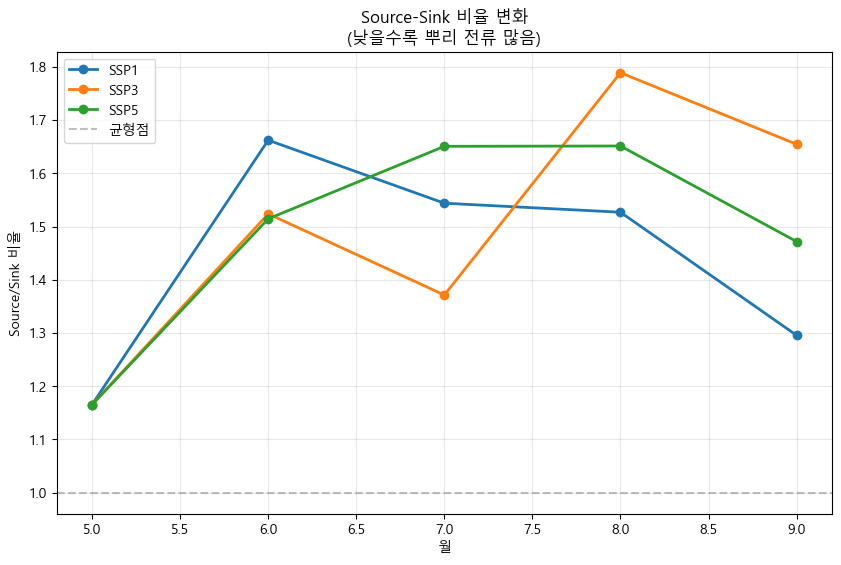

In [26]:
# 시각화
plt.figure(figsize=(10, 6))
for scenario in ['SSP1', 'SSP3', 'SSP5']:
    plt.plot(ss_analysis.index, ss_analysis[scenario], marker='o', label=scenario, linewidth=2)
plt.xlabel('월')
plt.ylabel('Source/Sink 비율')
plt.title('Source-Sink 비율 변화\n(낮을수록 뿌리 전류 많음)')
plt.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='균형점')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

- 잎에서 생산 -> 뿌리 전류 그래프 보여줌
- 균형점 1.0 왜 잡았는 지?
- 5월 = 겨울 저장 에너지 활용
- 6월 = 영양 생장 전성기 -> SSP1 = 활발 잎 줄기 성장
- 7월 = SSP5 = 성장 유지, SSP3 = 스트레스 반응 
- 8월 = SSP3 = 스트레스 회복기, SSP1, SSP5 = 상대적 안정
- 9월 = 모든 시나리오 하락 = 지하부 양분 축적 위해 의도적 낮춤

In [27]:
# 4-2. 뿌리 저장 효율 계산
# 8월 대비 9월 뿌리 저장 변화
for scenario in ['SSP1', 'SSP3', 'SSP5']:
    scenario_data = df_merged[df_merged['scenario'] == scenario]
    aug_data = scenario_data[scenario_data['month'] == 8]
    sep_data = scenario_data[scenario_data['month'] == 9]
    
    if len(aug_data) > 0 and len(sep_data) > 0:
        aug_root = aug_data['Root_TPC'].mean()
        sep_root = sep_data['Root_TPC'].mean()
        change = (sep_root - aug_root) / aug_root * 100
        print(f"{scenario}: 8월→9월 Root_TPC 변화 = {change:+.1f}%")

SSP1: 8월→9월 Root_TPC 변화 = +10.0%
SSP3: 8월→9월 Root_TPC 변화 = -5.6%
SSP5: 8월→9월 Root_TPC 변화 = +12.6%


### 열소산 월별/시나리오별 분석

<Figure size 1000x600 with 0 Axes>

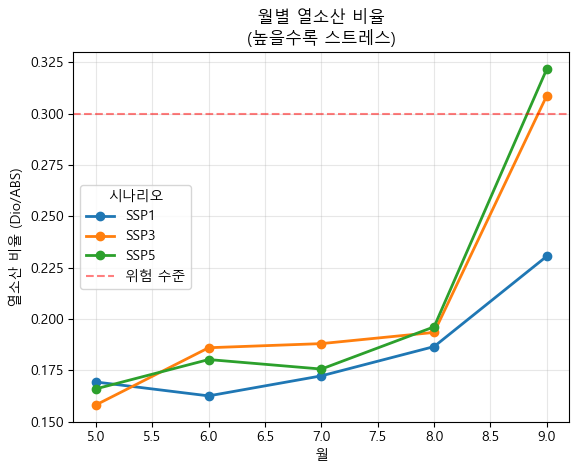


월별 열소산 비율:
scenario   SSP1   SSP3   SSP5
month                        
5         0.169  0.158  0.166
6         0.162  0.186  0.180
7         0.172  0.188  0.176
8         0.187  0.193  0.196
9         0.231  0.309  0.322


In [28]:
# 5-1. 월별 열소산
df_merged['dissipation_ratio'] = df_merged['Dio-RC'] / df_merged['ABS-RC']

monthly_dissipation = df_merged.groupby(['month', 'scenario'])['dissipation_ratio'].mean().unstack()

plt.figure(figsize=(10, 6))
monthly_dissipation.plot(kind='line', marker='o', linewidth=2)
plt.xlabel('월')
plt.ylabel('열소산 비율 (Dio/ABS)')
plt.title('월별 열소산 비율\n(높을수록 스트레스)')
plt.axhline(y=0.3, color='red', linestyle='--', alpha=0.5, label='위험 수준')
plt.legend(title='시나리오')
plt.grid(True, alpha=0.3)
plt.show()

print("\n월별 열소산 비율:")
print(monthly_dissipation.round(3))

### 추출수율 재해석

In [29]:
# 월별 추출수율과 TPC 관계
monthly_extraction_quality = df_merged.groupby('month').agg({
    'Leaf_ExtractionYield': 'mean',
    'Leaf_TPC': 'mean',
    'Root_ExtractionYield': 'mean',
    'Root_TPC': 'mean'
})

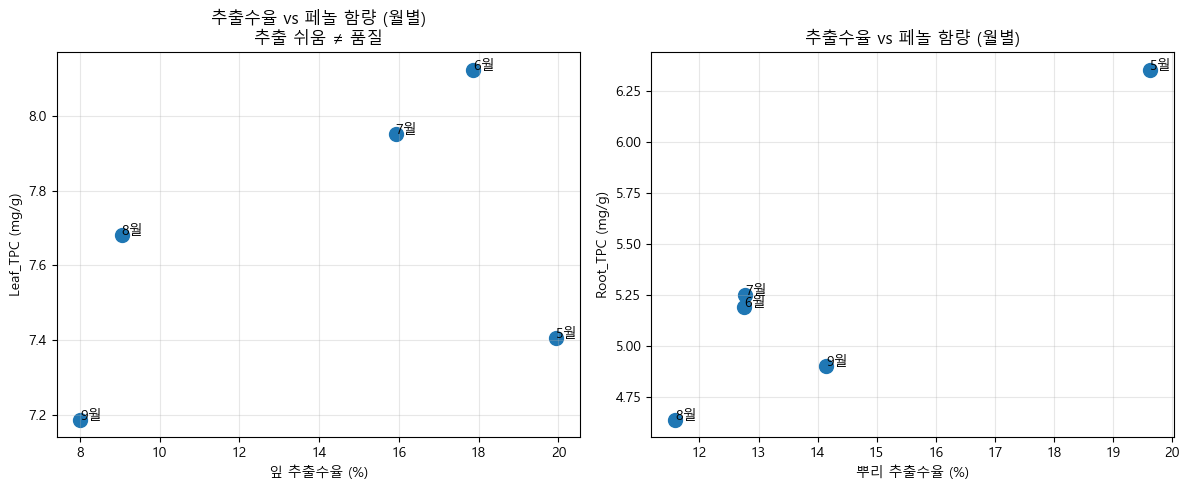

In [30]:
plt.figure(figsize=(12, 5))

# 잎
plt.subplot(1, 2, 1)
plt.scatter(monthly_extraction_quality['Leaf_ExtractionYield'], 
           monthly_extraction_quality['Leaf_TPC'], s=100)
for month in monthly_extraction_quality.index:
    plt.annotate(f'{month}월', 
                (monthly_extraction_quality.loc[month, 'Leaf_ExtractionYield'],
                 monthly_extraction_quality.loc[month, 'Leaf_TPC']))
plt.xlabel('잎 추출수율 (%)')
plt.ylabel('Leaf_TPC (mg/g)')
plt.title('추출수율 vs 페놀 함량 (월별)\n추출 쉬움 ≠ 품질')
plt.grid(True, alpha=0.3)

# 뿌리
plt.subplot(1, 2, 2)
plt.scatter(monthly_extraction_quality['Root_ExtractionYield'], 
           monthly_extraction_quality['Root_TPC'], s=100)
for month in monthly_extraction_quality.index:
    plt.annotate(f'{month}월', 
                (monthly_extraction_quality.loc[month, 'Root_ExtractionYield'],
                 monthly_extraction_quality.loc[month, 'Root_TPC']))
plt.xlabel('뿌리 추출수율 (%)')
plt.ylabel('Root_TPC (mg/g)')
plt.title('추출수율 vs 페놀 함량 (월별)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
# 상관관계
corr_leaf = monthly_extraction_quality['Leaf_ExtractionYield'].corr(monthly_extraction_quality['Leaf_TPC'])
corr_root = monthly_extraction_quality['Root_ExtractionYield'].corr(monthly_extraction_quality['Root_TPC'])

print(f"\n월별 추출수율-TPC 상관관계:")
print(f"  잎: r = {corr_leaf:.3f}")
print(f"  뿌리: r = {corr_root:.3f}")
print("→ 음의 상관 = 추출 쉬울 때 오히려 유효성분 낮음")


월별 추출수율-TPC 상관관계:
  잎: r = 0.434
  뿌리: r = 0.924
→ 음의 상관 = 추출 쉬울 때 오히려 유효성분 낮음
